# Table of Contents
### - Subset data and set date as index
### - Look for stationarity
### - Dickey-Fuller test
### - Autocorrelation chart
### - Differencing data

# Setting up Notebook

In [1]:
# Import relevant libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

In [2]:
# Configure style and warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
# Set API Key
quandl.ApiConfig.api_key = 'm5U1JC4r3TgxsTc9MFS4'

In [4]:
# Import Quandl variable
df = quandl.get('UMICH/SOC37')
df.head()

Good time to Buy  Uncertain  Bad time to Buy  Relative
Date                                                              
1978-01-31              48.0       17.0             35.0     113.0
1978-02-28              45.0       22.0             33.0     112.0
1978-03-31              55.0       13.0             32.0     123.0
1978-04-30              51.0       17.0             32.0     119.0
1978-05-31              50.0       18.0             32.0     118.0

# Question 3
## Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example).

In [5]:
# Will create subset with only the 'Good time to buy' column and date as the index
df_2 = df.reset_index()
df_2.head()

Date  Good time to Buy  Uncertain  Bad time to Buy  Relative
0 1978-01-31              48.0       17.0             35.0     113.0
1 1978-02-28              45.0       22.0             33.0     112.0
2 1978-03-31              55.0       13.0             32.0     123.0
3 1978-04-30              51.0       17.0             32.0     119.0
4 1978-05-31              50.0       18.0             32.0     118.0

In [6]:
df_3 = df_2[['Date', 'Good time to Buy']]
df_3.head()

Date  Good time to Buy
0 1978-01-31              48.0
1 1978-02-28              45.0
2 1978-03-31              55.0
3 1978-04-30              51.0
4 1978-05-31              50.0

In [7]:
# Reset date as the index
from datetime import datetime

df_3['datetime'] = pd.to_datetime(df_3['Date'])
df_3 = df_3.set_index('datetime')
df_3.drop(['Date'], axis = 1, inplace = True)
df_3.head()

Good time to Buy
datetime                    
1978-01-31              48.0
1978-02-28              45.0
1978-03-31              55.0
1978-04-30              51.0
1978-05-31              50.0

# Question 4
## Create a line chart of your data.

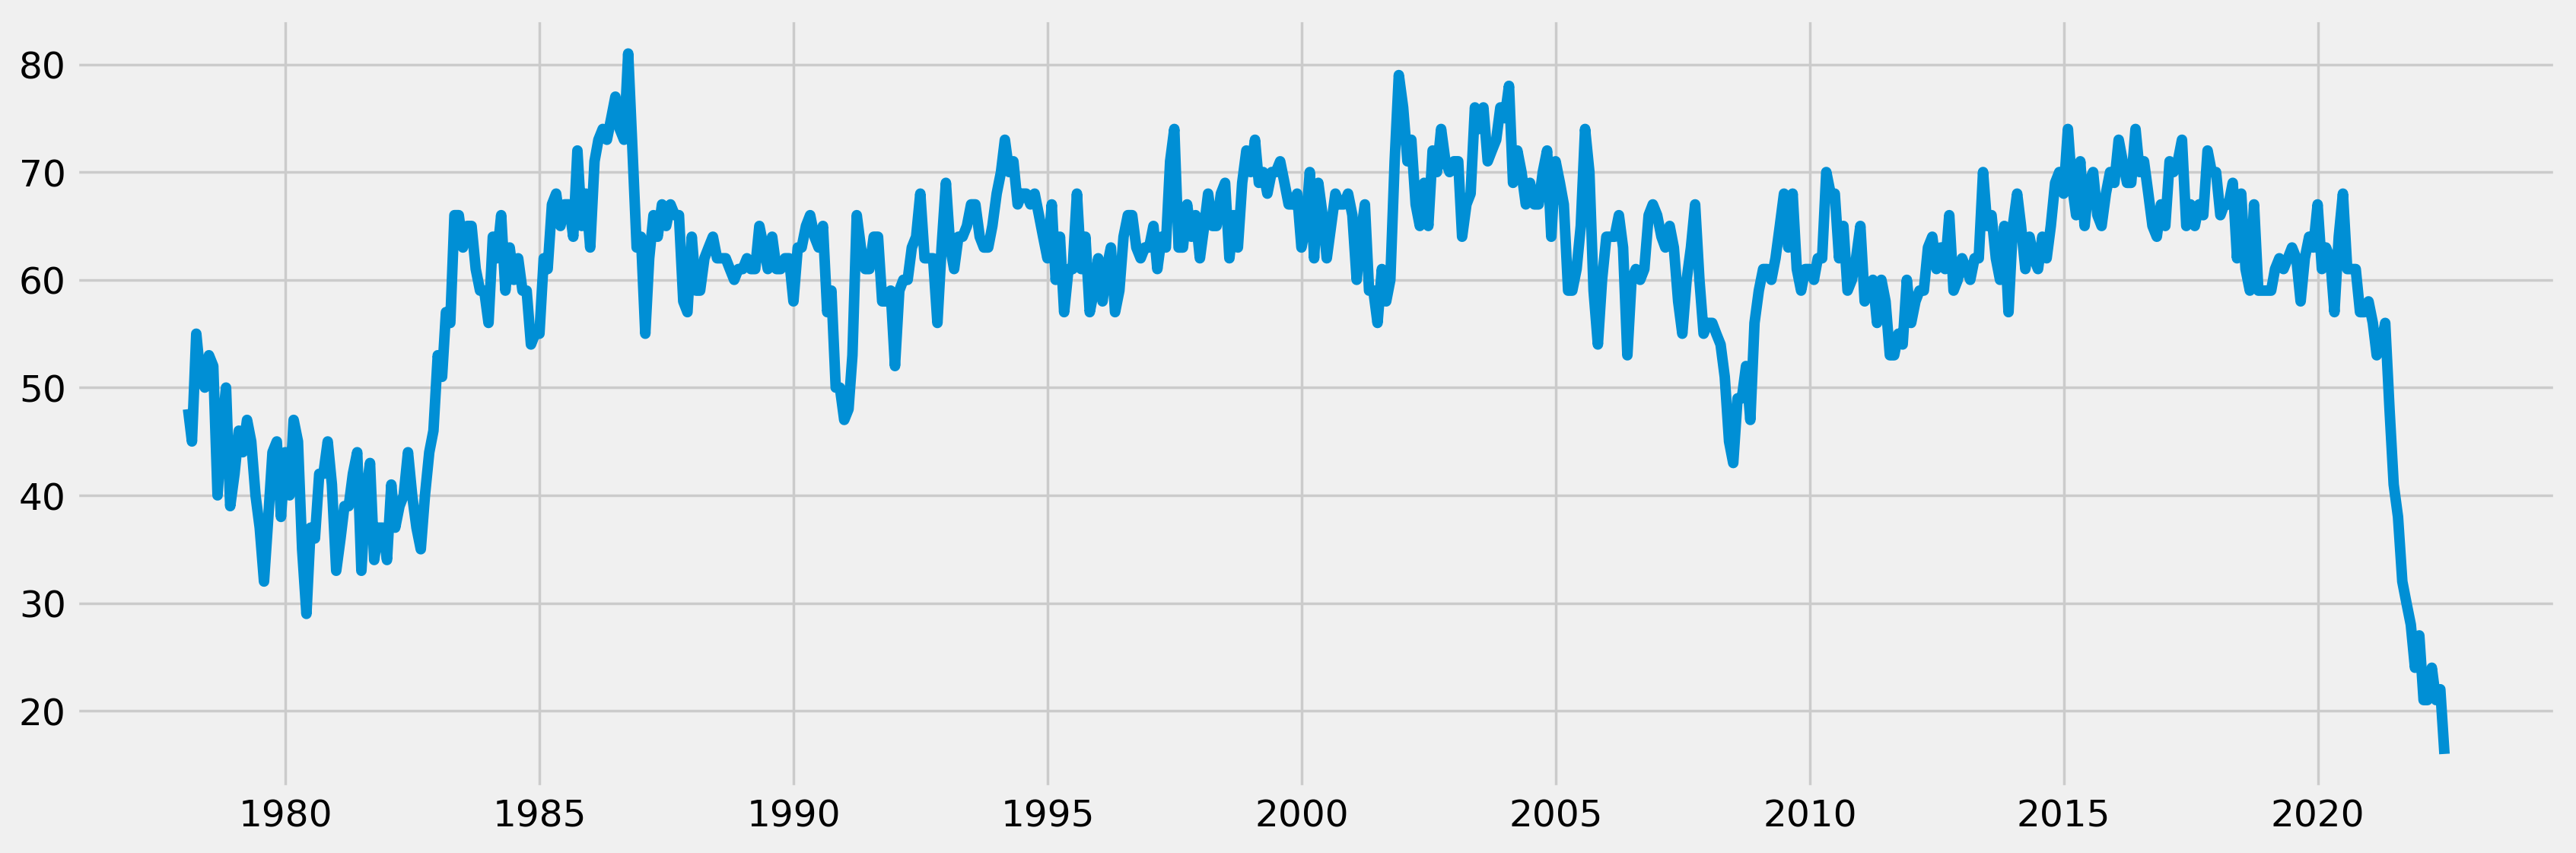

In [8]:
# Create line plot using matplotlib
plt.figure(figsize=(15,5), dpi=250)
plt.plot(df_3)

# Question 5
## Decompose the data’s components.

In [9]:
# Decompose chart
decomposition = sm.tsa.seasonal_decompose(df_3, model='additive')
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

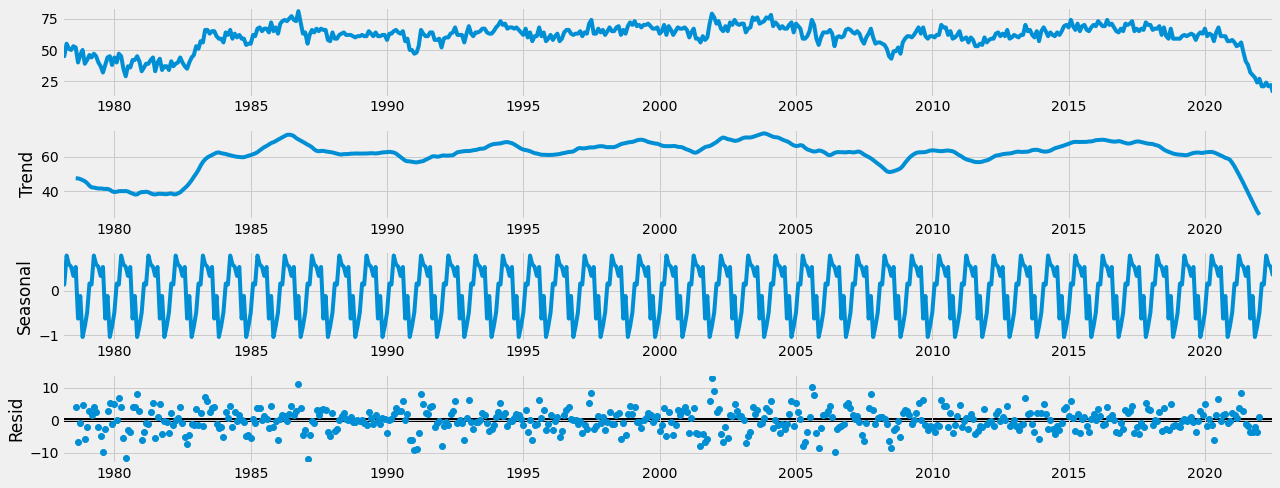

In [10]:
decomposition.plot()
plt.show()

### The presence of a trendline and seasonality both indicate that this is non-stationary in nature. The "overall" trend of the data seems to be fairly neutral, possibly marking this as a week non-stationary trend. We will run more statistical analysis to clarify

# Question 6
## Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.

In [11]:
# Conduct Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [12]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [13]:
dickey_fuller(df_3)

Dickey-Fuller Stationarity test:
Test Statistic                  -0.905690
p-value                          0.786093
Number of Lags Used              5.000000
Number of Observations Used    528.000000
Critical Value (1%)             -3.442796
Critical Value (5%)             -2.867030
Critical Value (10%)            -2.569694
dtype: float64


### Null hypothesis: If the test statistic is larger than the critical value at 5%, we cannot reject the null hypothesis. If it is smaller than the critical value, we can reject it. Based on the DF test, we can see that the test statistic is smaller than the 5% critical value. This means we cannot reject the null hypothesis and that the data is non-stationary. We will confirm this by running a plot of autocorrleation

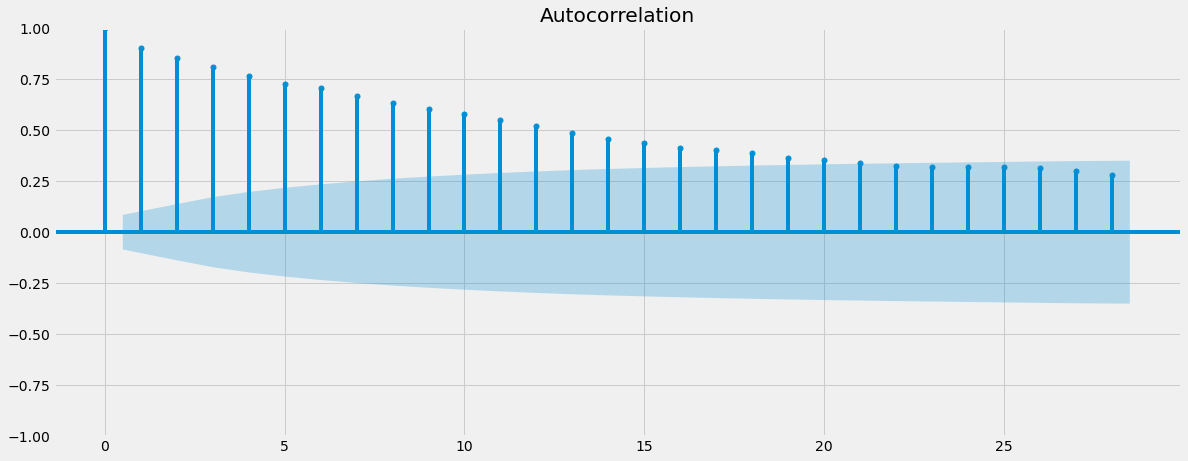

In [14]:
# Create autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_3)
plt.show()

### There are 22 bars that fall outside of the confidence interval, way more than 9 which is the rule of thumb in the industry. We will need to make this data stationary.

# Question 7
## If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [15]:
# Difference the data
df_dif = df_3 - df_3.shift(1)

In [17]:
# Drop NaN values that resulted from differencing
df_dif.dropna(inplace = True) 

In [18]:
# Check to ensure differencing was completed
df_dif.head()

Good time to Buy
datetime                    
1978-02-28              -3.0
1978-03-31              10.0
1978-04-30              -4.0
1978-05-31              -1.0
1978-06-30               3.0

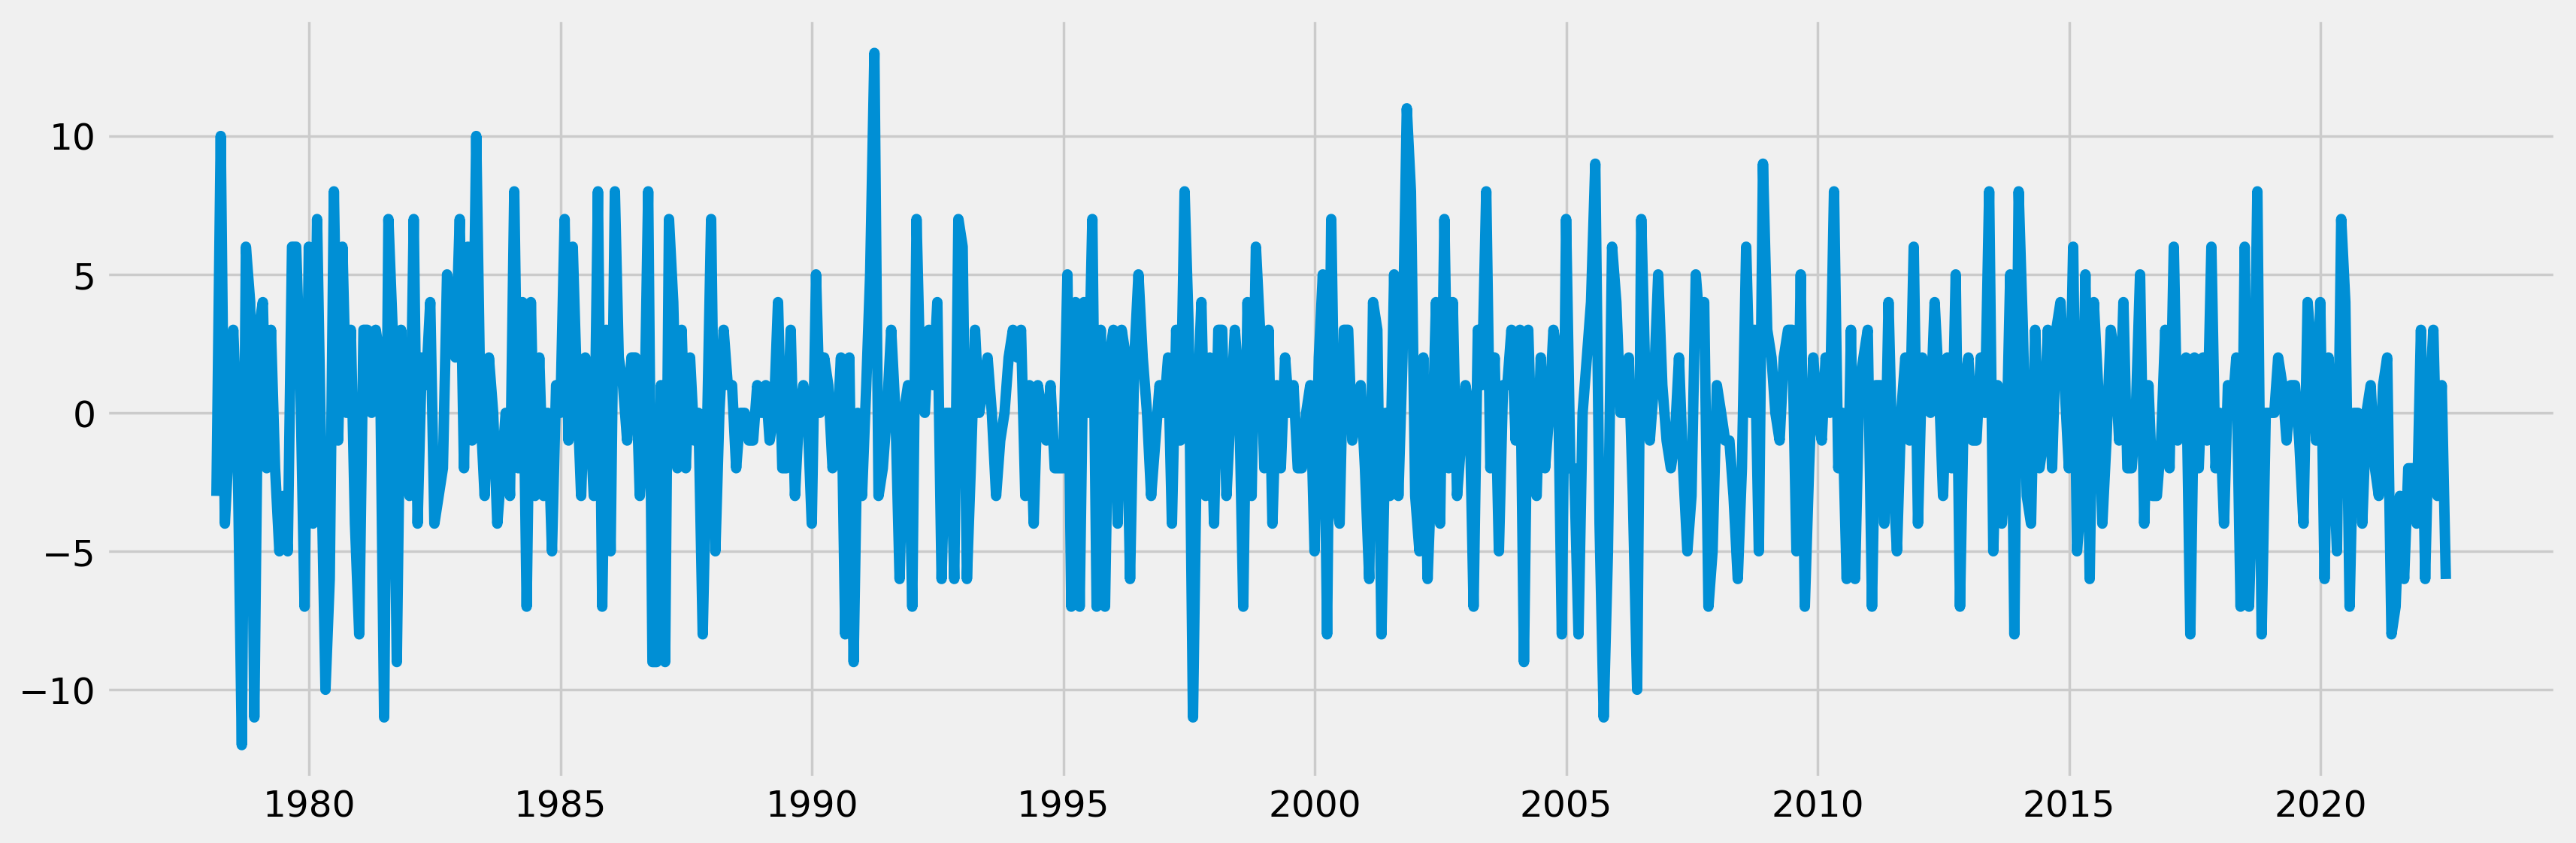

In [19]:
# Plot out the differenced dataset and run Dickey-Fuller test
plt.figure(figsize=(15,5), dpi=250)
plt.plot(df_dif)

In [20]:
# Much more stationary looking. Use statistics to confirm
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [21]:
dickey_fuller(df_dif)

Dickey-Fuller Stationarity test:
Test Statistic                -1.369223e+01
p-value                        1.337257e-25
Number of Lags Used            4.000000e+00
Number of Observations Used    5.280000e+02
Critical Value (1%)           -3.442796e+00
Critical Value (5%)           -2.867030e+00
Critical Value (10%)          -2.569694e+00
dtype: float64


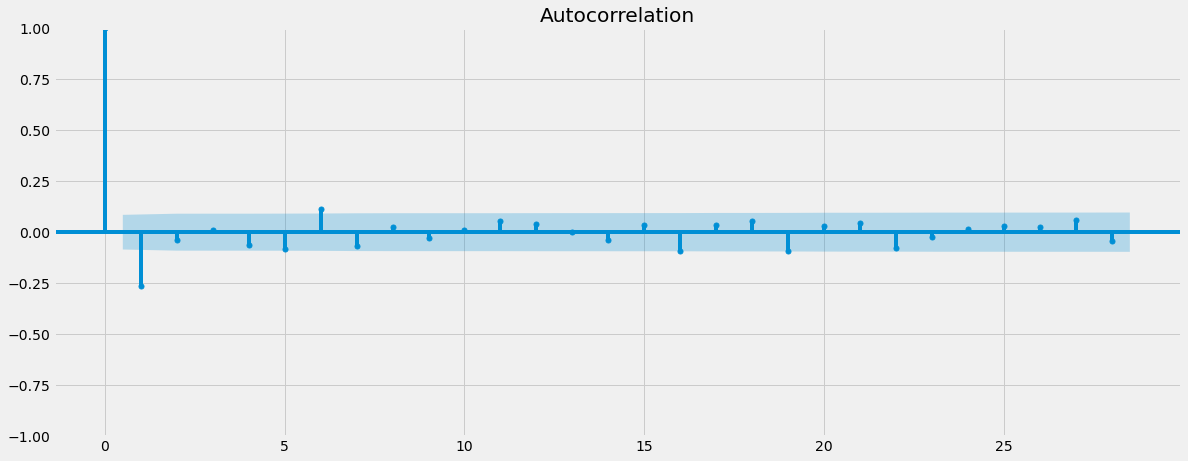

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_dif)
plt.show()

### Even though the autocorrelation chart shows it is ok, the DF test says otherwise. I will run another round of stationarizing

# Question 8
## If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [23]:
df_dif_2 = df_dif - df_dif.shift(1)
df_dif_2.dropna(inplace = True)

In [24]:
df_dif_2.head()

Good time to Buy
datetime                    
1978-03-31              13.0
1978-04-30             -14.0
1978-05-31               3.0
1978-06-30               4.0
1978-07-31              -4.0

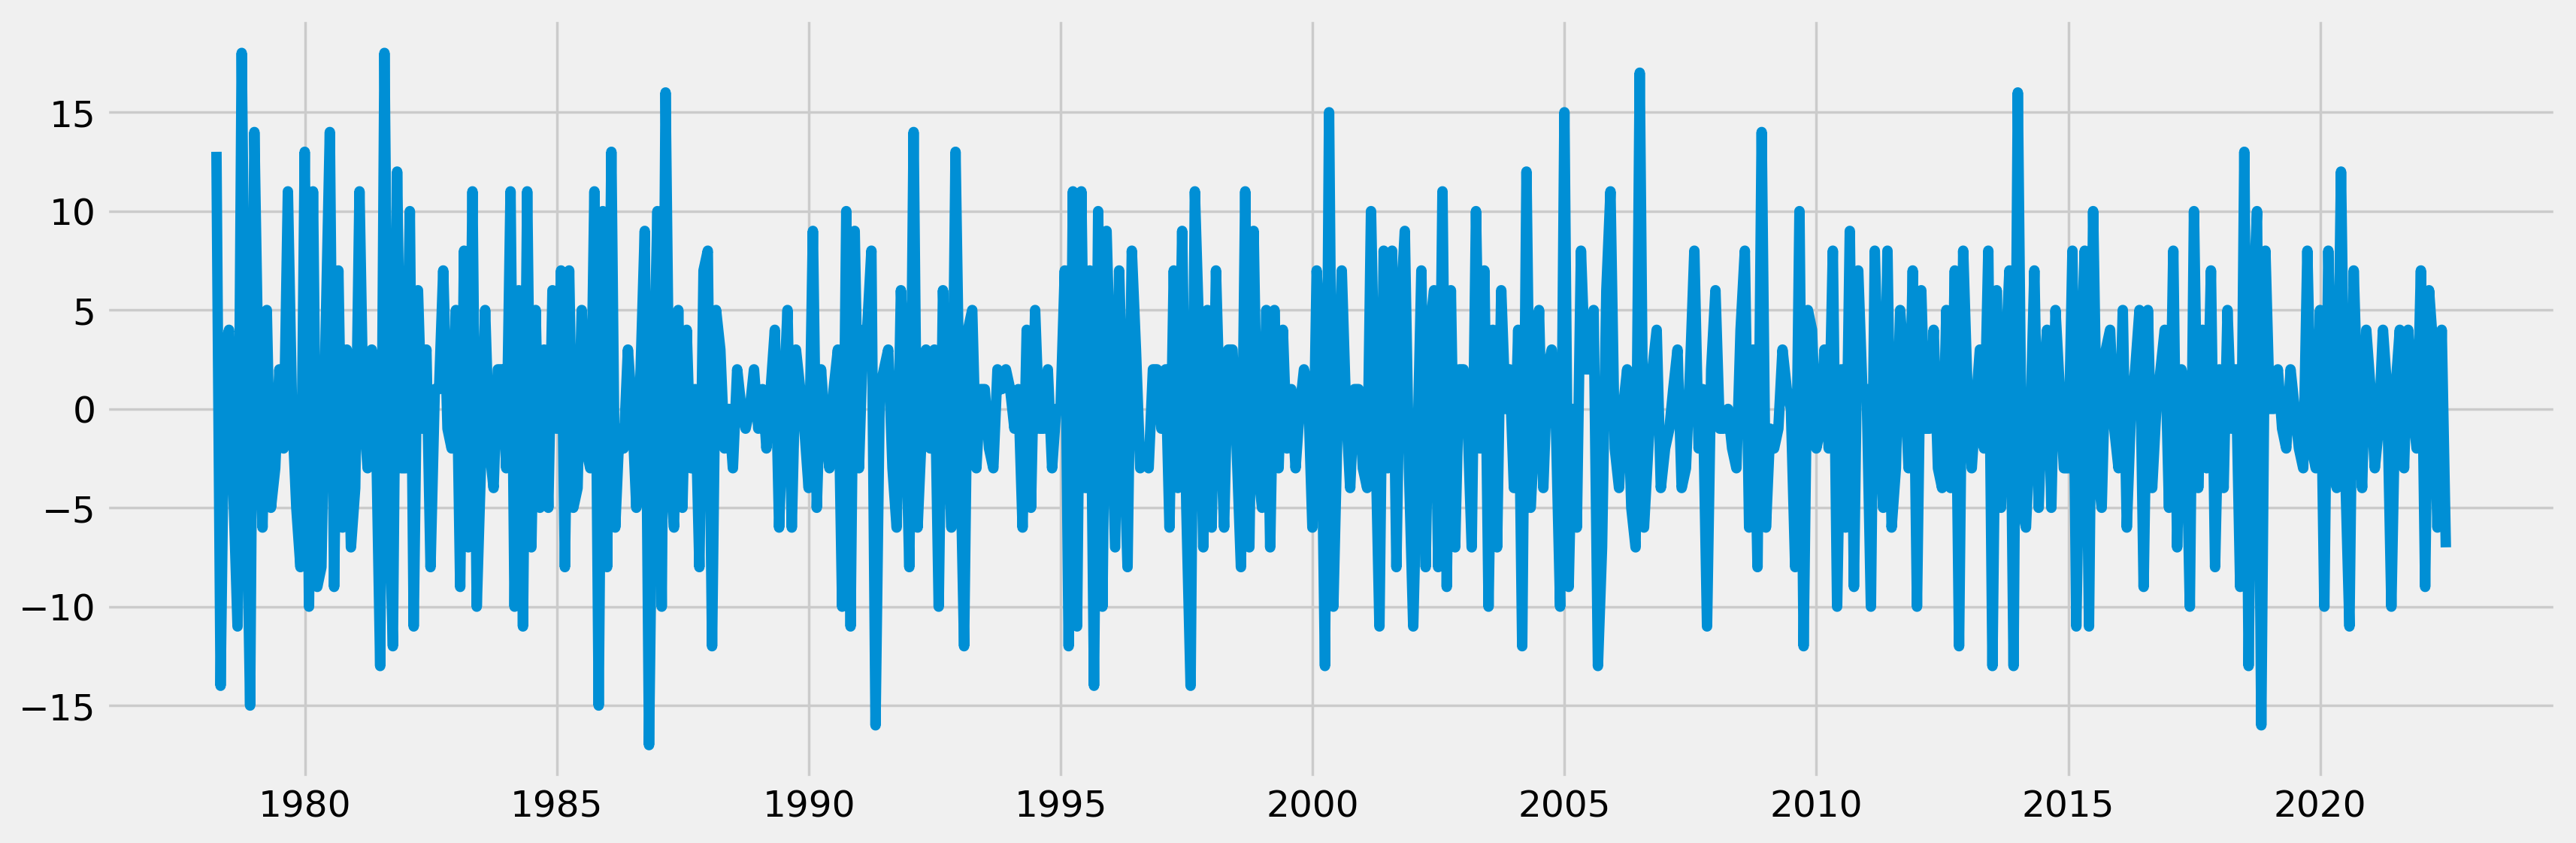

In [25]:
# Plot newly differenced data
plt.figure(figsize=(15,5), dpi=250)
plt.plot(df_dif_2)

In [26]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [27]:
dickey_fuller(df_dif_2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.059999e+01
p-value                        6.206705e-19
Number of Lags Used            1.600000e+01
Number of Observations Used    5.150000e+02
Critical Value (1%)           -3.443112e+00
Critical Value (5%)           -2.867168e+00
Critical Value (10%)          -2.569768e+00
dtype: float64


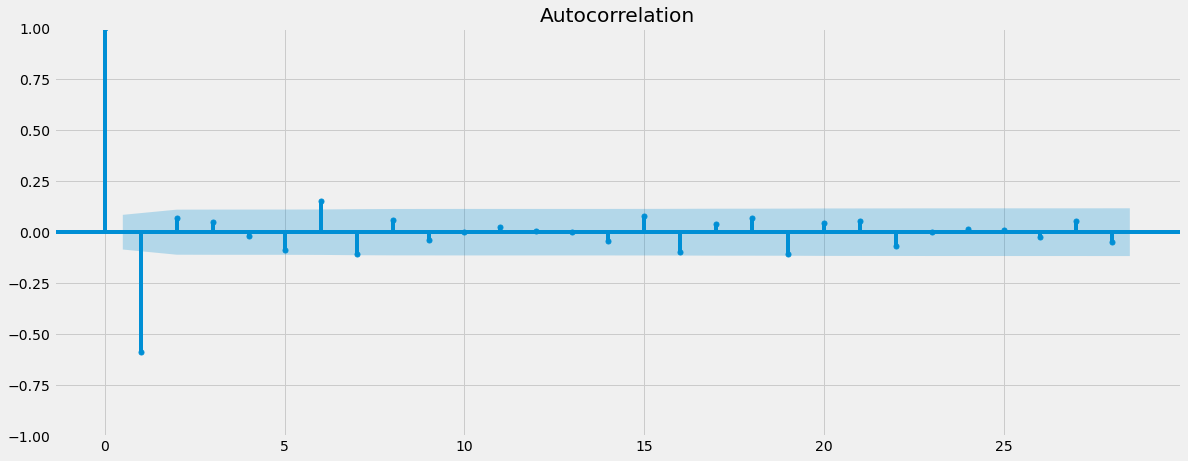

In [29]:
plot_acf(df_dif_2)
plt.show()